# Research Questions

>1. Can we build a model that forecasts future CO2 emissions?
>2. Can we improve the model by incorporating features other than time-series data of CO2? How can we identify the important features?

This analysis attempts to answer to the above main questions. However, during the examination of the dataset, several challenges were identified. [1] There is a substantial amount of missing data, with some features over 50% missing values. [2] The dataset includes 21 features, making feature selection complex. [3] The dataset contians time-series data 'Year', which requires time-series regression for future forecast. Therefore, this analysis also aims to tackle these challenges. The structure of this analysis and its main contributions are outlined below.

1. **Section 1:Missing Data** aims to retain as many features as possible. By visualising missing data in an interactive heatmap, the progress of missing data handling can be monitored by updating the graph after each treatment.
2. **Section 2:Univariate Time-Series** tests different time-series regression models against carbon emission (ARIMA/AR)
3. **Section 3:ML with RFE** visualises feature importance selected by ***ElasticNet*** and ***RandomForest***, which are finalised with ***Recursive Feature Elimination(RFE)***.
4. **Conclusion** provides the evaluation of selected time-series models and ML models with RFE, and the limitations of this anlaysis

# Install the packages

In [4]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


# Load Data & Explore Dataset

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [9]:
# Load Data
df = pd.read_csv('global-data-on-sustainable-energy (1).csv')

In [10]:
#Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [11]:
#Sample Data
df.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

In [12]:
#Make the column names shorter for readability
old_columns = df.keys()

new_columns = ['Entity', 'Year', 'acc_to_elec(%)',
       'acc_to_fuel(%)',
       'renew_cap_per_capital',
       'finance_to_developing($)',
       'renew_final(%)',
       'elec_fuel(TWh)', 'elec_nuclear(TWh)',
       'elec_renew(TWh)',
       'low_carbon_elec(%)',
       'primary_consum(kWh/pp)',
       'primary_intensity (MJ/2017 PPP GDP)',
       'co2_by_country(kt)',
       'renew_primary(%)', 'gdp_growth(%)',
       'gdp_per_capita', 'Density(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude']

df.columns = new_columns

col_list = {'old_col' : old_columns, 'new_col' : new_columns}
var_desc = pd.DataFrame(data=col_list)
var_desc

old_col  \
0                                              Entity   
1                                                Year   
2             Access to electricity (% of population)   
3                   Access to clean fuels for cooking   
4   Renewable-electricity-generating-capacity-per-...   
5      Financial flows to developing countries (US $)   
6   Renewable energy share in the total final ener...   
7                 Electricity from fossil fuels (TWh)   
8                      Electricity from nuclear (TWh)   
9                   Electricity from renewables (TWh)   
10             Low-carbon electricity (% electricity)   
11  Primary energy consumption per capita (kWh/per...   
12  Energy intensity level of primary energy (MJ/$...   
13                  Value_co2_emissions_kt_by_country   
14           Renewables (% equivalent primary energy)   
15                                         gdp_growth   
16                                     gdp_per_capita   
17                                   Density\n(P/Km2)   
18                                     Land Area(Km2)   
19                                           Latitude   
20                                          Longitude   

                                new_col  
0                                Entity  
1                                  Year  
2                        acc_to_elec(%)  
3                        acc_to_fuel(%)  
4                 renew_cap_per_capital  
5              finance_to_developing($)  
6                        renew_final(%)  
7                        elec_fuel(TWh)  
8                     elec_nuclear(TWh)  
9                       elec_renew(TWh)  
10                   low_carbon_elec(%)  
11               primary_consum(kWh/pp)  
12  primary_intensity (MJ/2017 PPP GDP)  
13                   co2_by_country(kt)  
14                     renew_primary(%)  
15                        gdp_growth(%)  
16                       gdp_per_capita  
17                       Density(P/Km2)  
18                       Land Area(Km2)  
19                             Latitude  
20                            Longitude

In [13]:
# Duplicates : N/A
df[df.duplicated()==True]

Empty DataFrame
Columns: [Entity, Year, acc_to_elec(%), acc_to_fuel(%), renew_cap_per_capital, finance_to_developing($), renew_final(%), elec_fuel(TWh), elec_nuclear(TWh), elec_renew(TWh), low_carbon_elec(%), primary_consum(kWh/pp), primary_intensity (MJ/2017 PPP GDP), co2_by_country(kt), renew_primary(%), gdp_growth(%), gdp_per_capita, Density(P/Km2), Land Area(Km2), Latitude, Longitude]
Index: []

[0 rows x 21 columns]

In [14]:
#Original Data Type
print("df['Density(P/Km2)'] original data type:",df['Density(P/Km2)'].dtype)

#Change Data Type
for i in range(0,len(df['Density(P/Km2)'])):
    df['Density(P/Km2)'] = df.iloc[i]['Density(P/Km2)'].replace(',','')

df['Density(P/Km2)'] = df['Density(P/Km2)'].astype(dtype='int64')

#New Data Type
print("df['Density(P/Km2)'] new data type:",df['Density(P/Km2)'].dtype)

df['Density(P/Km2)'] original data type: object
df['Density(P/Km2)'] new data type: int64


# Section 1: Missing Data
This section follows the below steps. \
**Step 1**: check the percentage of missing data within each feature, and visualise the missing data with missingno.\
**Step 2**: visualise the correlation between features to confirm whether dropping features would impact the performance.\
**Step 3**: handle missing data and check the progess with an interactive heatmap

## Step 1: Missingno

In [17]:
# Missing Data
original_missing = df.isnull().sum()
original_len_df = len(df)

# Calculate % of missing values in dataset
null_percent = (original_missing/len(df)* 100).map('{:.2f}%'.format)
null_table = pd.concat([original_missing, null_percent], axis=1)
null_table.columns = (['before', 'null %'])
null_table = null_table.sort_values('before',ascending=False)

print(null_table)

                                     before  null %
renew_primary(%)                       2137  58.56%
finance_to_developing($)               2089  57.25%
renew_cap_per_capital                   931  25.51%
co2_by_country(kt)                      428  11.73%
gdp_growth(%)                           317   8.69%
gdp_per_capita                          282   7.73%
primary_intensity (MJ/2017 PPP GDP)     207   5.67%
renew_final(%)                          194   5.32%
acc_to_fuel(%)                          169   4.63%
elec_nuclear(TWh)                       126   3.45%
low_carbon_elec(%)                       42   1.15%
elec_fuel(TWh)                           21   0.58%
elec_renew(TWh)                          21   0.58%
acc_to_elec(%)                           10   0.27%
Latitude                                  1   0.03%
Land Area(Km2)                            1   0.03%
Longitude                                 1   0.03%
Density(P/Km2)                            0   0.00%
primary_cons

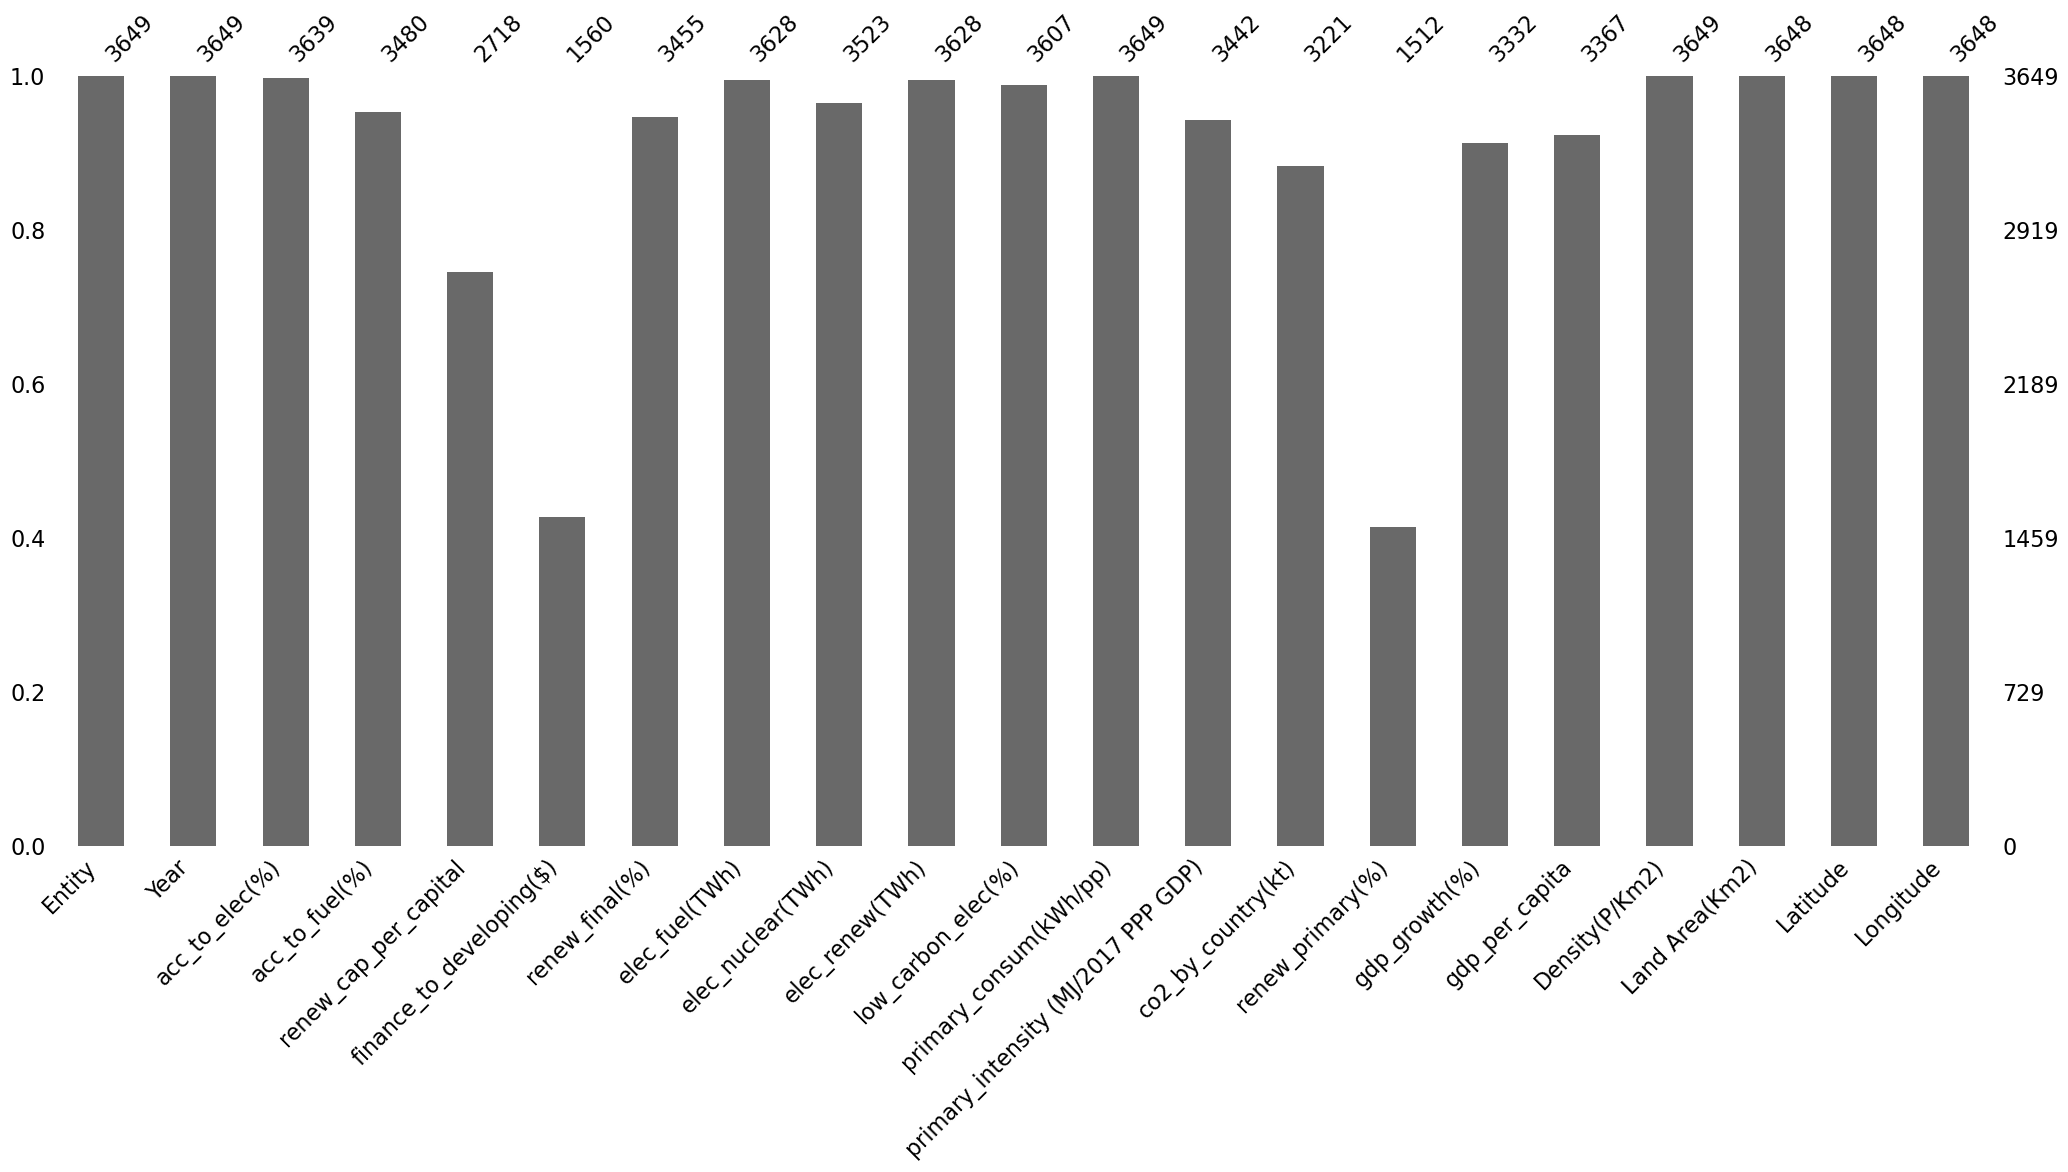

In [18]:
#Visualise missing data
import missingno as msno
msno.bar(df);

## Step 2: Feature Correlation

<Figure size 800x600 with 0 Axes>

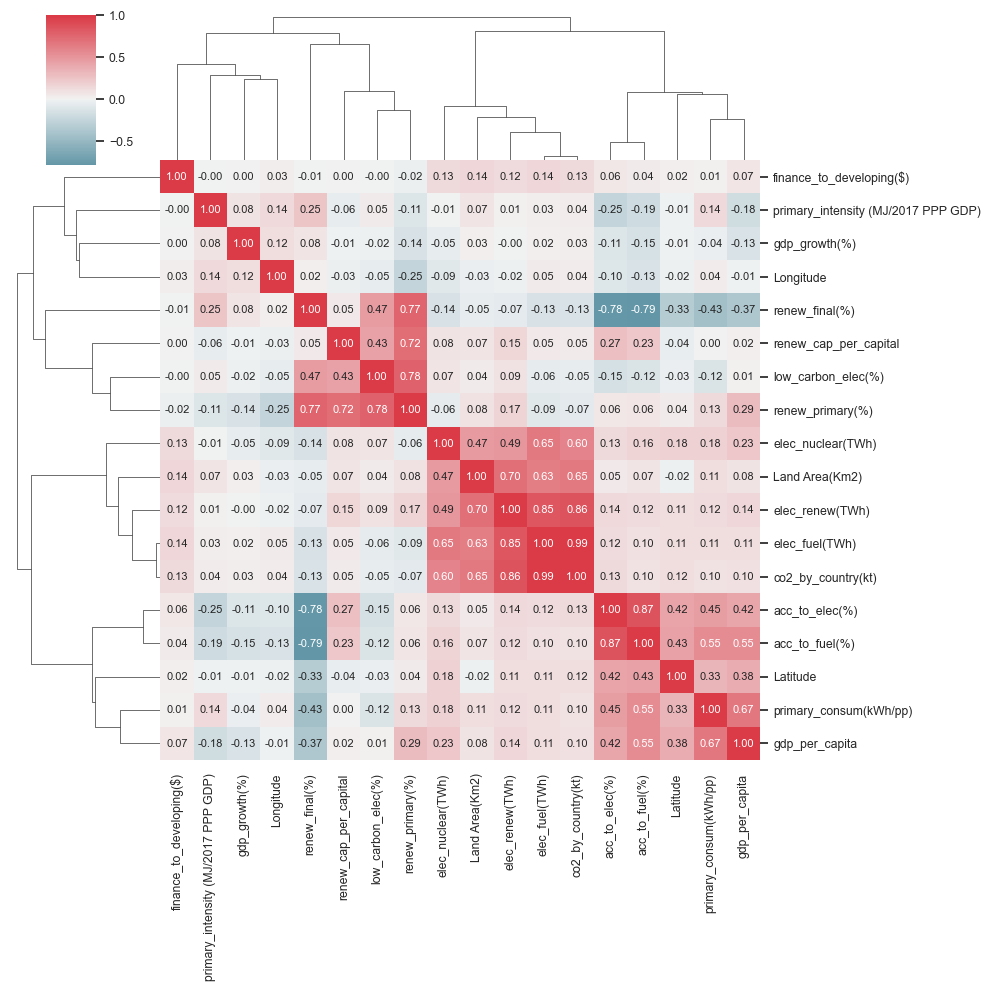

In [20]:
# Correlation Table
df_corr = df.drop(['Year', 'Entity', 'Density(P/Km2)'], axis=1).corr()

# Visualise Clustermap
plt.figure(figsize=(8,6))

sns.set(font_scale=0.8)
sns.clustermap(df_corr, annot=True, annot_kws={"size": 8}, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0,
                cbar_pos=(0.05, 0.83, 0.05, 0.15))

plt.savefig('correlation clustermap.png')
plt.show();

**Summary**\
We can learn the below points about the dataset through the correlation clustermap.

1.  Features can be grouped into 4 groups.
    - Group 1 : [acc_to_elec(%), acc_to_fuel(%), Latitude, primary_consum(kWh/pp), gdp_per_capita]
    - Group 2 : [co2_by_country(kt), elec_fuel(TWh), elec_renew(TWh), Land Area(Km2), elec_nuclear(TWh)]
    - Group 3 : [renew_primary(%), low_carbon_elec(%), renew_cap_per_capital, renew_final(%)]
    - Group 4 : [Longitude, gdp_growth(%), primary_intensity (MJ/2017 PPP GDP), finance_to_developing($)]
<br><br>
2. Each 'Group' may represent the below.
    - Group 1 : features related to energy demand
    - Group 2 : featrues related to carbon emission
    - Group 3 : features related to renewable energy
    - Group 4 : features related to economic status of countries
<br><br>
3.  Other Insights
    - Group 1 : Latitude is related to the energy demand somehow
    - Group 2 : Larger the Land Area is, the greater the energy consumption is.
    - Group 3 : renew_final(%) is the last feature grouped, implying it shows the least similarity across all features.

**Conclusion** The below listed features will be dropped.
- **Group 3 (renew_primary(%))** is a good candidate to represent Group 3, considering its high correlation across Group 3. However, 58% of its data is missing and Group 3 shows weak correlation with the other groups.
- **Group 3 (renew_cap_per_capital)** behaves similarly to 'renew_final(%)', which is the only feature showing a strong negative correlation with Group 1. Therefore, including 'renew_final(%)' will provide more explanatory power to the model.
- Group 4 : the correlation within the group and with carbon emission(target variable) is very weak

## Step 3: Handling Missing Data

### 1) Dropping Features

In [24]:
# Dropping Features
df = df.drop(['finance_to_developing($)','renew_primary(%)', 'renew_cap_per_capital'], axis=1)

In [25]:
null_table['after'] = df.isnull().sum().map('{:.0f}'.format)
print(null_table)

                                     before  null % after
renew_primary(%)                       2137  58.56%   NaN
finance_to_developing($)               2089  57.25%   NaN
renew_cap_per_capital                   931  25.51%   NaN
co2_by_country(kt)                      428  11.73%   428
gdp_growth(%)                           317   8.69%   317
gdp_per_capita                          282   7.73%   282
primary_intensity (MJ/2017 PPP GDP)     207   5.67%   207
renew_final(%)                          194   5.32%   194
acc_to_fuel(%)                          169   4.63%   169
elec_nuclear(TWh)                       126   3.45%   126
low_carbon_elec(%)                       42   1.15%    42
elec_fuel(TWh)                           21   0.58%    21
elec_renew(TWh)                          21   0.58%    21
acc_to_elec(%)                           10   0.27%    10
Latitude                                  1   0.03%     1
Land Area(Km2)                            1   0.03%     1
Longitude     

### 2) Handling Missing Data
By selecting the dropdown menu, you can select the feature and see which countires are missing per year. We will investigate feature by feature, and drop the data based on the visualised missing value data. Then, re-run the code to check what has been changed after treating missing value.

In [27]:
import plotly.graph_objects as go

fig = go.Figure()
features_with_missing_data = []

# Generate heatmaps for each feature
for feature in df.columns.difference(['Entity', 'Year']):
    temp_df = df[['Entity', 'Year', feature]].copy()
    temp_df[feature] = temp_df[feature].isnull().astype(int)
    
    # Check if there are missing values
    if temp_df[feature].sum() > 0:
        features_with_missing_data.append(feature)
        pivot_df = temp_df.pivot(index='Year', columns='Entity', values=feature).fillna(0)

        fig.add_trace(go.Heatmap(
            z=pivot_df.values,
            x=pivot_df.columns,
            y=pivot_df.index,
            colorscale='Viridis',
            colorbar=dict(title='Missing', tickvals=[0, 1], ticktext=['No', 'Yes']),
            showscale=True,
            name=feature,
            visible=(feature == features_with_missing_data[0])  # Show only the first feature by default
        ))

# Dropdown menu for selecting different features
dropdown_buttons = []
for feature in features_with_missing_data:
    dropdown_buttons.append(dict(
        label=feature,
        method="update",
        args=[{"visible": [feature == trace.name for trace in fig.data]},
              {"title": f"Missing Values Per Year by Feature: {feature}"}]
    ))

fig.update_layout(
    width=1000,
    height=600,
    autosize=False,
    template="plotly_white",
    updatemenus=[
        dict(buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            pad={"r": 5, "t": 0},
            x=1,
            xanchor="right",
            y=1.15,
            yanchor="top")],
    xaxis_title="Countries",
    yaxis_title="Years",
    title=f"Missing Values By Country / Year: {features_with_missing_data[0] if features_with_missing_data else 'None'}"
)

fig.show()

**1-1) Entire Data for French Guinea is dropped**\
Investigating 'Latitude','Land Area(Km2)','Longitude' shows that their missing values are coming from the same entry, French Guinea, which only has 1 record in 2000 across the research term.

In [29]:
# Drop French Guinea
temp_drop = df[df['Latitude'].isnull()]['Entity']
df = df[~(df['Entity'].isin(temp_drop))]

**1-2) Our main target variable is 'co2_by_country(kt)'**, requiring caution in hadling this variable.

1. Almost all values are missing in 2020, so the entire year is dropped from the dataset (please check the heatmap above)
2. Countries with no values from 2000 to 2020 are dropped.
3. Some countries, like Australia, have missing values from 2016 to 2020, setting 2016 as the cutoff for train-test split.

In [31]:
# Save as 'holdout' before dropping values
holdout = df[(df['Year']==2020) | (df['co2_by_country(kt)'].isnull())]

# Drop missing values from 'co2_by_country(kt)'
df = df.dropna(subset='co2_by_country(kt)',axis=0)
df = df[~(df['Year']==2020)]

print('holdout, remaining data: ({}, {})'.format(len(holdout), len(df)))

holdout, remaining data: (427, 3221)


**1-3) Some missing values can be filled with the below equation**
> ***Equation A :*** [low_carbon_elec(%) = (nuclear + renew) / total electiriciy]

In [33]:
# ----------------------------------------------------------------------------------------------------------------------------------- # 
# this code is to check if Equation A is true or not.
# ----------------------------------------------------------------------------------------------------------------------------------- # 

# Build DataFrame for verification
col1 = np.round(df['low_carbon_elec(%)'])
col2 = np.round(((df['elec_nuclear(TWh)']+df['elec_renew(TWh)'])/(df['elec_fuel(TWh)']+df['elec_nuclear(TWh)']+df['elec_renew(TWh)']))*100)
col3 = (col1==col2)
d = {'low_carbon_elec(%)':col1, 'cal_%':col2, 'check':col3}
check_low_carbon = pd.DataFrame(data=d)

# Check the counts of True & False
print (check_low_carbon['check'].value_counts())

# ----------------------------------------------------------------------------------------------------------------------------------- # 
# conclusion : 138 False cases found, meaing Equation A is not true for these values. This is explainable as there are 138 
#              values exist in 'elec_nuclear(TWh)'. Thus, there is not way Equation A is true when there exists missing value.
#              Excluding these values, it proves Equation A is true for all the cases. 
# ----------------------------------------------------------------------------------------------------------------------------------- # 

check
True     3083
False     138
Name: count, dtype: int64


In [ ]:
# Handling Missing Data

# Fill elec_nuclear(TWh) with Equation A
df['elec_nuclear(TWh)'] = df['elec_nuclear(TWh)'].fillna(
    ((df['low_carbon_elec(%)']-1)*df['elec_renew(TWh)']+df['low_carbon_elec(%)']*df['elec_fuel(TWh)'])/(df['low_carbon_elec(%)']+1))

# Fill low_carbon_elec(%) with Equation A
df['low_carbon_elec(%)'] = df['low_carbon_elec(%)'].fillna(
    (df['elec_nuclear(TWh)']+df['elec_renew(TWh)'])/(df['elec_nuclear(TWh)']+df['elec_renew(TWh)']+df['elec_fuel(TWh)'])*100)

**1-4) Any countries with more than 50% missing data for feature are dropped**

In [35]:
# Filter countries based on missing data threshold
for feature in df.keys():
    missing_counts = df.groupby('Entity')[feature].apply(lambda x: x.isnull().sum())
    total_years = df['Year'].nunique()
    missing_percentage = missing_counts / total_years
    
    # Identify countries with more than 50% missing data for the feature
    countries_to_drop = missing_percentage[missing_percentage > 0.5].index

    # Save as 'holdout' before dropping values
    holdout = pd.concat([holdout,df[df['Entity'].isin(countries_to_drop)]], axis=0)
    
    # Drop these countries from the DataFrame
    df = df[~df['Entity'].isin(countries_to_drop)]

print('original data:\t', original_len_df)
print('dropped data:\t', len(holdout))
print('remaining data:', len(df))

original data:	 3649
dropped data:	 655
remaining data: 2993


**1-5)'gdp_per_capita' and 'acc_to_elec(%)'** are interpolated\
Visualisation shows that the 'gdp_per_capita' of countries with missing value has upright trend. So we will interpolate null value, except for South Sudan and Czechia, where most of data are missing.

In [37]:
# Fillna with interpolation
missing_features = df.columns[df.isnull().any()].tolist()

for feature in missing_features:
    df[feature] = df[feature].interpolate(method='linear')
    df[feature] = df[feature].fillna(method='bfill')

### 3) Final Result

In [39]:
null_table['after'] = df.isnull().sum().map('{:.0f}'.format)
print(null_table)

                                     before  null % after
renew_primary(%)                       2137  58.56%   NaN
finance_to_developing($)               2089  57.25%   NaN
renew_cap_per_capital                   931  25.51%   NaN
co2_by_country(kt)                      428  11.73%     0
gdp_growth(%)                           317   8.69%     0
gdp_per_capita                          282   7.73%     0
primary_intensity (MJ/2017 PPP GDP)     207   5.67%     0
renew_final(%)                          194   5.32%     0
acc_to_fuel(%)                          169   4.63%     0
elec_nuclear(TWh)                       126   3.45%     0
low_carbon_elec(%)                       42   1.15%     0
elec_fuel(TWh)                           21   0.58%     0
elec_renew(TWh)                          21   0.58%     0
acc_to_elec(%)                           10   0.27%     0
Latitude                                  1   0.03%     0
Land Area(Km2)                            1   0.03%     0
Longitude     

# Data Visualisation

In [41]:
#Set Region: Separate top 3 countries / Rest of World
conditions = [(df['Entity'] == 'China'),(df['Entity'] == 'United States'),(df['Entity'] == 'India')]
choices = ['China', 'USA', 'India']
df['Region'] = np.select(conditions, choices, default='Rest of the World')

#Build Pivot table
co2_pivot = pd.pivot_table(df, values='co2_by_country(kt)', index='Year',columns='Region')
co2_pivot['top3_sum'] = co2_pivot[['China', 'USA', 'India']].sum(axis=1)
co2_pivot['total_sum'] = co2_pivot.sum(axis=1)

#Change Index to Datetime
co2_pivot

Region         China         India  Rest of the World          USA  \
Year                                                                 
2000    3.346530e+06  9.378600e+05       66920.206897  5775810.000   
2001    3.529080e+06  9.535400e+05       68164.482759  5748260.000   
2002    3.810060e+06  9.854500e+05       69051.172181  5593029.785   
2003    4.415910e+06  1.011770e+06       71134.137276  5658990.234   
2004    5.124820e+06  1.085670e+06       72426.206854  5738290.039   
2005    5.824630e+06  1.136470e+06       73142.551483  5753490.234   
2006    6.437470e+06  1.215210e+06       74196.827326  5653080.078   
2007    6.993180e+06  1.336740e+06       74936.325859  5736319.824   
2008    7.199600e+06  1.424380e+06       75281.904593  5558379.883   
2009    7.719070e+06  1.564880e+06       71851.224298  5156430.176   
2010    8.474920e+06  1.659980e+06       75286.666472  5392109.863   
2011    9.282550e+06  1.756740e+06       76437.414853  5173600.098   
2012    9.541870e+06  1.909440e+06       77843.061391  4956060.059   
2013    9.984570e+06  1.972430e+06       77721.621720  5092100.098   
2014    1.000667e+07  2.147110e+06       76593.783909  5107209.961   
2015    9.861100e+06  2.158020e+06       76807.904683  4990709.961   
2016    9.874660e+06  2.195250e+06       77102.973320  4894500.000   
2017    1.009601e+07  2.320410e+06       77593.783704  4819370.117   
2018    1.050293e+07  2.451930e+06       77229.054487  4975310.059   
2019    1.070722e+07  2.456300e+06       77051.216489  4817720.215   

Region      top3_sum     total_sum  
Year                                
2000    1.006020e+07  2.018732e+07  
2001    1.023088e+07  2.052992e+07  
2002    1.038854e+07  2.084613e+07  
2003    1.108667e+07  2.224447e+07  
2004    1.194878e+07  2.396999e+07  
2005    1.271459e+07  2.550232e+07  
2006    1.330576e+07  2.668572e+07  
2007    1.406624e+07  2.820742e+07  
2008    1.418236e+07  2.844000e+07  
2009    1.444038e+07  2.895261e+07  
2010    1.552701e+07  3.112931e+07  
2011    1.621289e+07  3.250222e+07  
2012    1.640737e+07  3.289258e+07  
2013    1.704910e+07  3.417592e+07  
2014    1.726099e+07  3.459857e+07  
2015    1.700983e+07  3.409647e+07  
2016    1.696441e+07  3.400592e+07  
2017    1.723579e+07  3.454917e+07  
2018    1.793017e+07  3.593757e+07  
2019    1.798124e+07  3.603953e+07

In [42]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

# Plot Line Graphs per Country
for entity in df['Entity'].unique():
    entity_data = df[df['Entity'] == entity]
    fig.add_trace(go.Scatter(
        x=entity_data['Year'],
        y=entity_data['co2_by_country(kt)'],
        mode='lines',
        name=entity))

# Plot Line Graphs per Region
for region in co2_pivot.columns:
    if region == 'China' or region == 'USA' or region == 'India':
        fig.add_trace(go.Scatter(x=co2_pivot.index,
                                 y=co2_pivot[region],
                                 name=region,
                                 mode='lines',
                                 visible=False))
    else:
        fig.add_trace(go.Scatter(x=co2_pivot.index,
                                 y=co2_pivot[region],
                                 name=region,
                                 mode='lines',
                                 line=dict(width=2, dash='dashdot'),
                                 visible=False))
                         
# Update the layout
fig.update_layout(
    title='CO2 Emissions by Country',
    width=1000,
    height=600,
    xaxis=dict(title='Year',dtick=1),
    yaxis=dict(title='CO2 Emissions (kt)'),
    updatemenus=[
        dict(type = "buttons",
             direction = "right",
             buttons=list([ dict(label="Per Country",
                                method="update",
                                args=[{"visible":[True]*len(df['Entity'].unique())+[False]*len(co2_pivot.columns)}]),
                             dict(label="Per Region",
                                method="update",
                                args=[{"visible":[False]*len(df['Entity'].unique())+[True]*len(co2_pivot.columns)}])]),
            showactive=True,
            pad={"r": 5, "t": 0},
            x=1,
            xanchor="right",
            y=1.15,
            yanchor="top")])

# Show the figure
fig.show()

**CO2 Emissions Per Country**\
It displays distinctive patterns for China, the USA, and India, while most other countries cluster at the bottom. With 176 countries, visualizing the entire dataset is challenging. To simplify, all countries except the top three are grouped as 'Rest of the World.'

**CO2 Emissions Per Region**\
It reveals that China is the largest contributor to increasing CO2 emissions in total, and the top three countries combined account for 50% of all emissions.

# Section 2 : Time-Series Model
In this section, a time-series prediction is conducted for univaraite variable, 'co2_by_country(kt)'. Here we employ Auto-ARIMA and AR to find the best time-series model that provides the baseline for the final experiment.\
https://www.kaggle.com/code/bagavathypriya/auto-arima-for-time-series-modelling

In [46]:
# Set indext of co2_pivot as DateTime
co2_pivot.index = pd.to_datetime(co2_pivot.index, format='%Y')

# Custom Train Test Spliter: time_split
def time_split(df, split_year):
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        train_data = df[df['Year']<=split_year]
        test_data = df[df['Year']>split_year]
        
    else:
        train_data = df[df.index.year<=split_year]
        test_data = df[df.index.year>split_year]
    
    return train_data, test_data

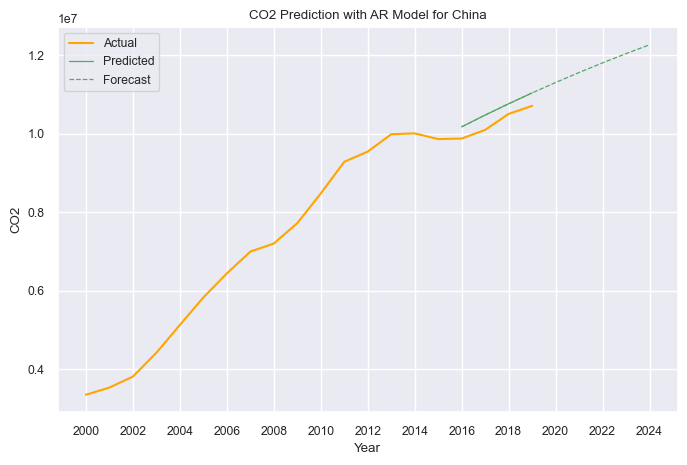

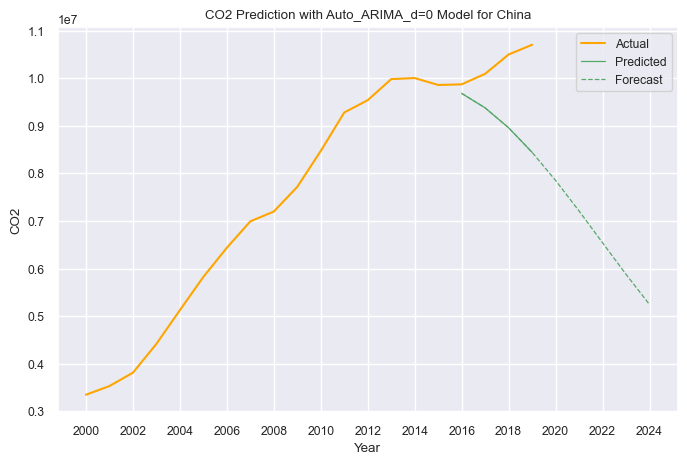

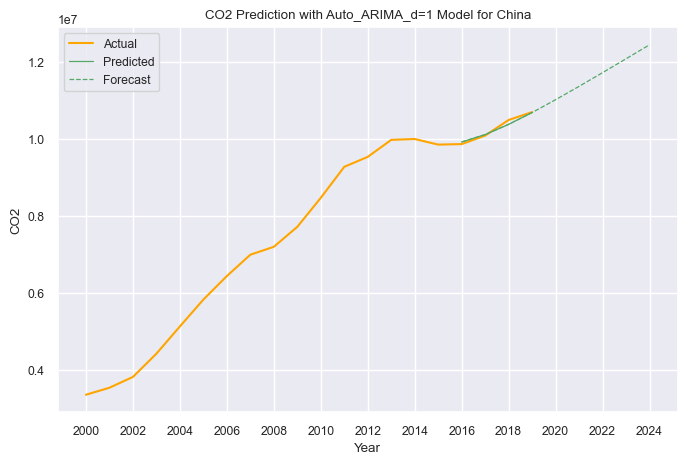

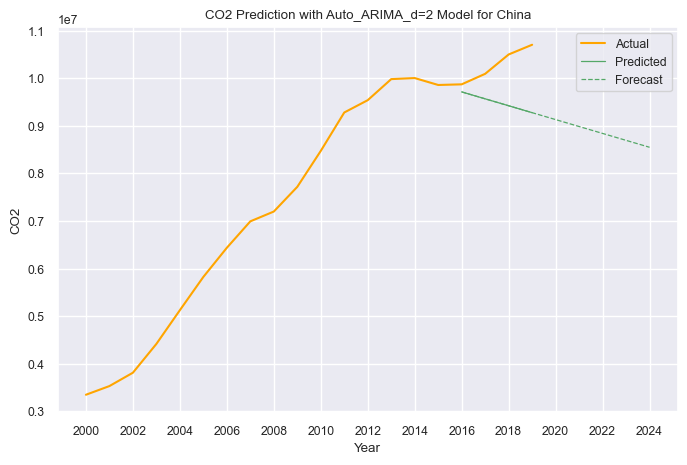

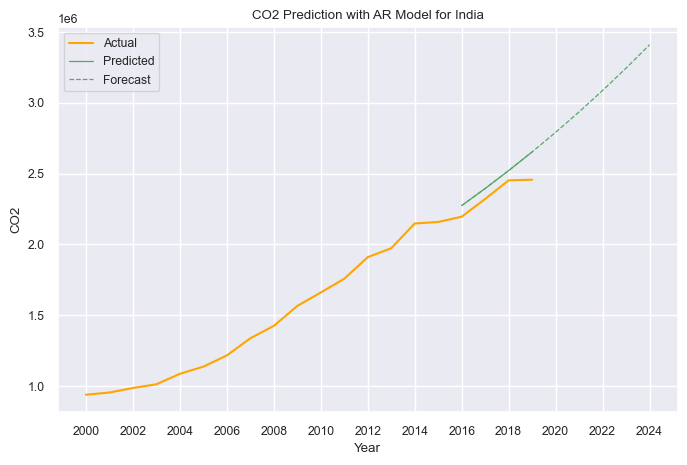

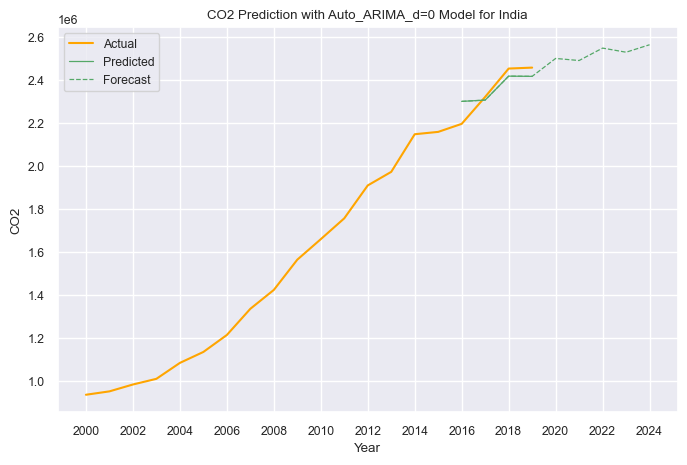

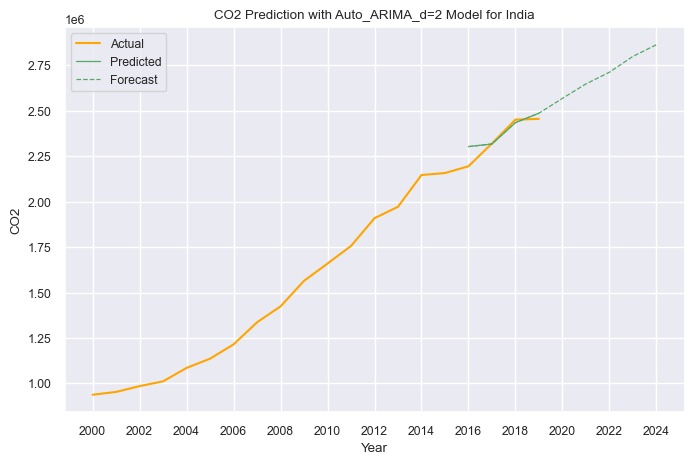

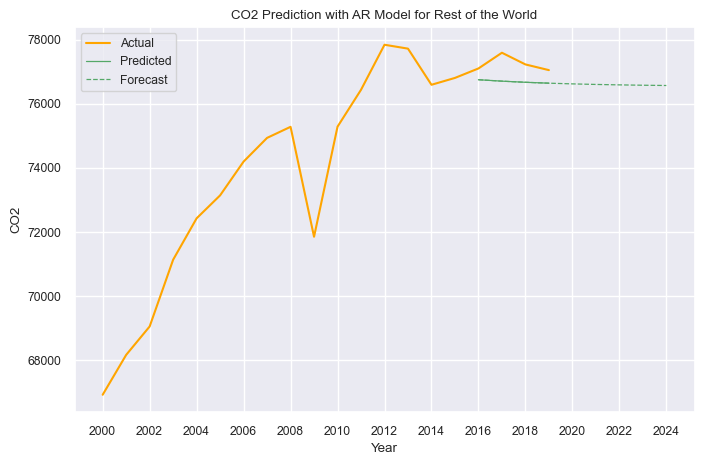

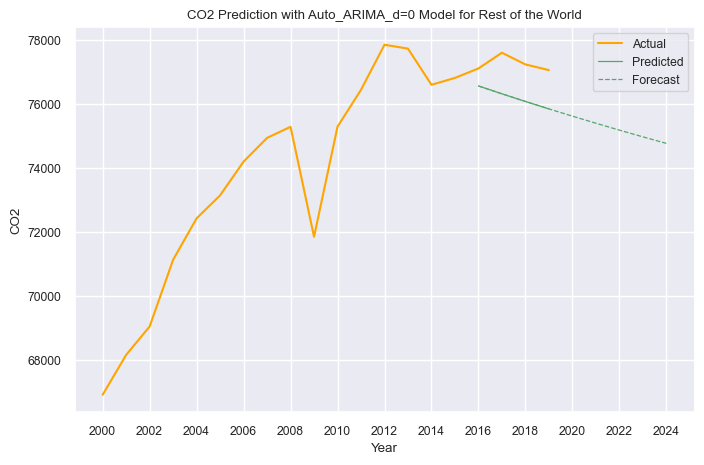

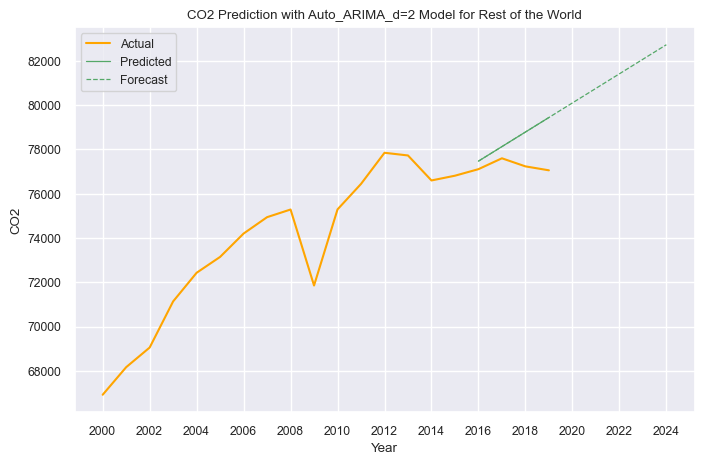

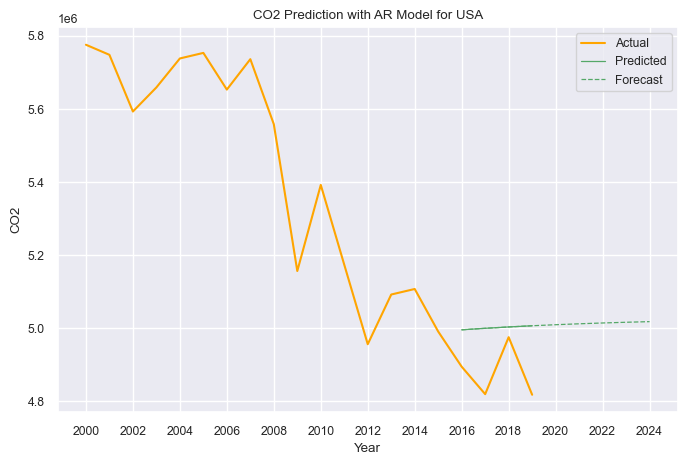

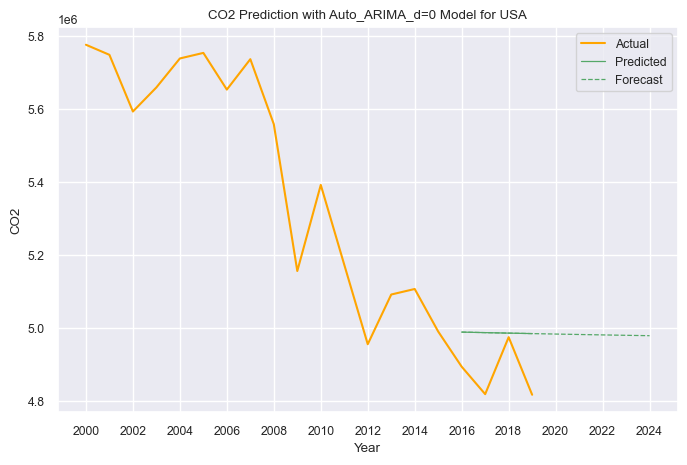

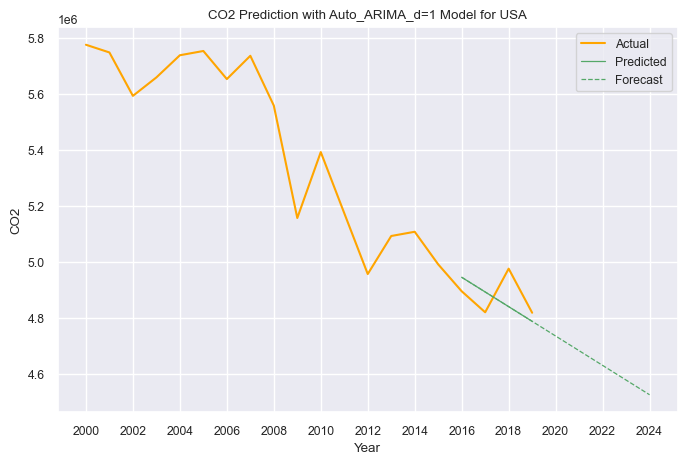

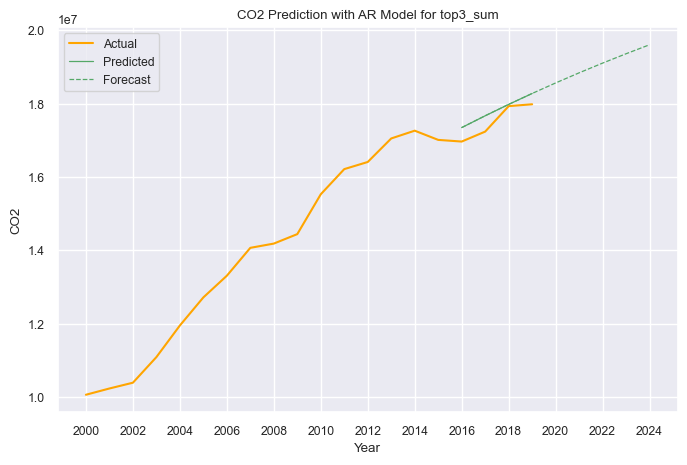

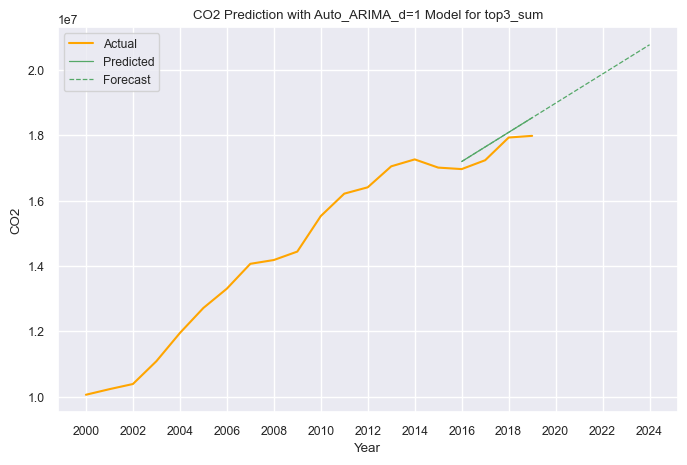

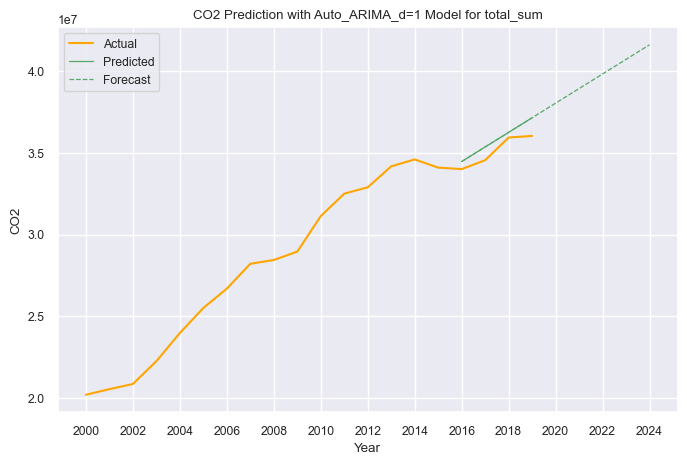

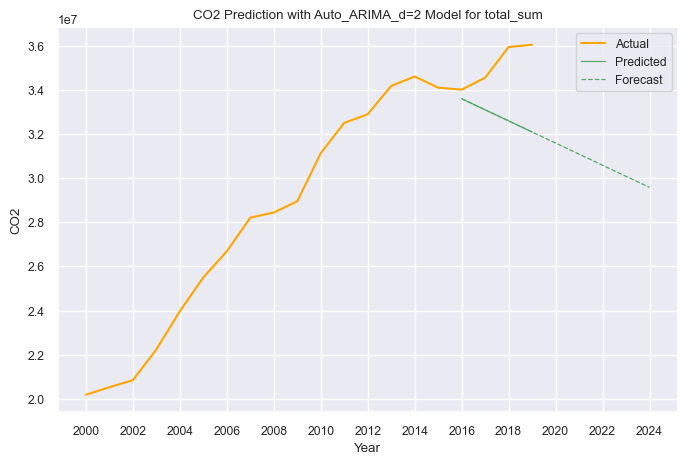

--- Results Summary ---
trained on: 2993
total_result:


Region train,test           Model       MAE       MSE  \
2               China    (16, 4)  Auto_ARIMA_d=1  0.007718  0.000095   
0               China    (16, 4)              AR  0.047476  0.002297   
3               China    (16, 4)  Auto_ARIMA_d=2  0.119822  0.019758   
1               China    (16, 4)  Auto_ARIMA_d=0  0.176942  0.045390   
6               India    (16, 4)  Auto_ARIMA_d=1  0.032835  0.002006   
7               India    (16, 4)  Auto_ARIMA_d=2  0.032451  0.002179   
5               India    (16, 4)  Auto_ARIMA_d=0  0.039926  0.002347   
4               India    (16, 4)              AR  0.085621  0.009240   
8   Rest of the World    (16, 4)              AR  0.050430  0.002906   
9   Rest of the World    (16, 4)  Auto_ARIMA_d=0  0.095964  0.009930   
11  Rest of the World    (16, 4)  Auto_ARIMA_d=2  0.110384  0.017797   
10  Rest of the World    (16, 4)  Auto_ARIMA_d=1  0.110923  0.017951   
14                USA    (16, 4)  Auto_ARIMA_d=1  0.088186  0.010105   
13                USA    (16, 4)  Auto_ARIMA_d=0  0.134692  0.024362   
12                USA    (16, 4)              AR  0.151895  0.029439   
15                USA    (16, 4)  Auto_ARIMA_d=2  0.217809  0.059232   
16           top3_sum    (16, 4)              AR  0.040064  0.002025   
18           top3_sum    (16, 4)  Auto_ARIMA_d=1  0.046861  0.002654   
19           top3_sum    (16, 4)  Auto_ARIMA_d=2  0.159146  0.035096   
17           top3_sum    (16, 4)  Auto_ARIMA_d=0  0.179254  0.044261   
20          total_sum    (16, 4)              AR  0.040016  0.002021   
22          total_sum    (16, 4)  Auto_ARIMA_d=1  0.046955  0.002664   
23          total_sum    (16, 4)  Auto_ARIMA_d=2  0.159032  0.035043   
21          total_sum    (16, 4)  Auto_ARIMA_d=0  0.179127  0.044194   

        RMSE         R2       Best model  
2   0.009758   0.960658  ARIMA=(1, 1, 0)  
0   0.047925   0.051050              n/a  
3   0.140563  -7.163221  ARIMA=(0, 2, 0)  
1   0.213050 -17.753635  ARIMA=(2, 0, 1)  
6   0.044789   0.742369  ARIMA=(2, 1, 2)  
7   0.046684   0.720103  ARIMA=(2, 2, 2)  
5   0.048446   0.698574  ARIMA=(3, 0, 0)  
4   0.096123  -0.186616              n/a  
8   0.053910  -6.721436              n/a  
9   0.099650 -25.382771  ARIMA=(1, 0, 0)  
11  0.133404 -46.282588  ARIMA=(0, 2, 1)  
10  0.133981 -46.692827  ARIMA=(0, 1, 0)  
14  0.100523  -0.616160  ARIMA=(0, 1, 1)  
13  0.156083  -2.896417  ARIMA=(1, 0, 0)  
12  0.171579  -3.708518              n/a  
15  0.243376  -8.473529  ARIMA=(2, 2, 0)  
16  0.045005   0.454556              n/a  
18  0.051518   0.285264  ARIMA=(0, 1, 1)  
19  0.187340  -8.451185  ARIMA=(0, 2, 0)  
17  0.210383 -10.919096  ARIMA=(2, 0, 0)  
20  0.044954   0.454995              n/a  
22  0.051611   0.281609  ARIMA=(0, 1, 1)  
23  0.187198  -8.450916  ARIMA=(0, 2, 0)  
21  0.210225 -10.918989  ARIMA=(2, 0, 0)

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

results = []

for region in co2_pivot.columns:

    #Split Train_Test_set
    split_year = 2015
    train_data, test_data = time_split(co2_pivot[region], split_year)

    #Normalise Data    
    scaler = MinMaxScaler()
    train = scaler.fit_transform(train_data.values.reshape(-1,1))
    test = scaler.transform(test_data.values.reshape(-1,1))
    
    #Set forecast years
    forecast_years = len(test)+5

    # Initialize time series cross-validator
    tscv = TimeSeriesSplit(n_splits=3)
    estimators = {'AR': AutoReg(train, lags=1)}

    for d in [0, 1, 2]:  # Add more values of d if needed
        arima_key = f'Auto_ARIMA_d={d}'
        estimators[arima_key] = auto_arima(train, seasonal=False, stepwise=True, d=d)

    for name, model in estimators.items():
        
        #Predict with AR
        if name == 'AR':
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=forecast_years)
            pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
            summary = 'n/a'

        #Predict with ARIMA
        else:
            model_fit = model.fit(train)
            pred = model_fit.predict(n_periods=len(test))
            forecast = model_fit.predict(n_periods=forecast_years)
            summary = 'ARIMA='+str(model_fit.order)
     
        #Get Test Metric
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(test, pred)

        #Reverse the scaled data back to original scale        
        pred = scaler.inverse_transform(pred.reshape(-1,1))
        forecast = scaler.inverse_transform(forecast.reshape(-1,1))

        #Build Series for Prediction / Forecast
        pred = pd.Series(pred.flatten(), index=test_data.index)
        forecast = pd.Series(forecast.flatten(), index=pd.date_range(start='2016', end='2024', freq='YS'))
        
        #Save Results
        result = {'Region': region, 'train,test':(len(train), len(test)),
                  'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'Best model': summary,
                  'Predicted Values': pred,'Forecast Values': forecast}
        results.append(result)

        # Visualize the results
        plt.figure(figsize=(8, 5))
        plt.plot(co2_pivot.index.year, co2_pivot[region], label='Actual', color = 'orange')
        plt.plot(pred.index.year, pred, lw=0.9, label='Predicted', color='g', ls='-')
        plt.plot(forecast.index.year, forecast, lw=0.9, label='Forecast', color='g', ls='--')
        
        plt.title('CO2 Prediction with {} Model for {}'.format(name, region))
        plt.xticks(np.arange(2000,2025,step=2))
        plt.xlabel('Year')
        plt.ylabel('CO2')
        plt.legend()
        plt.show()

print('--- Results Summary ---')
print('trained on:', len(df))
print('total_result:')
time_series_results = pd.DataFrame(results).drop(['Predicted Values', 'Forecast Values'], axis=1)
time_series_results.sort_values('RMSE')

In [48]:
#Select Only the Best Results
print('best_result:')
best_time_series = time_series_results.sort_values(by=['Region', 'R2']).groupby('Region').last().reset_index()
best_time_series

best_result:


Region train,test           Model       MAE       MSE      RMSE  \
0              China    (16, 4)  Auto_ARIMA_d=1  0.007718  0.000095  0.009758   
1              India    (16, 4)  Auto_ARIMA_d=1  0.032835  0.002006  0.044789   
2  Rest of the World    (16, 4)              AR  0.050430  0.002906  0.053910   
3                USA    (16, 4)  Auto_ARIMA_d=1  0.088186  0.010105  0.100523   
4           top3_sum    (16, 4)              AR  0.040064  0.002025  0.045005   
5          total_sum    (16, 4)              AR  0.040016  0.002021  0.044954   

         R2       Best model  
0  0.960658  ARIMA=(1, 1, 0)  
1  0.742369  ARIMA=(2, 1, 2)  
2 -6.721436              n/a  
3 -0.616160  ARIMA=(0, 1, 1)  
4  0.454556              n/a  
5  0.454995              n/a

# Section 3: Feature Selection
This section follows the below steps. \
**Step 1**: check feature importance with ElasticNet and RF.\
**Step 2**: select features using Recursive Feature Elimination(RFE) that fits the model and finds the most important features by droping the weakest features.\
**Step 3**: compare the linear model vs non-linear model

## Step 1: Feature Importance Analysis with ElasticNet and RandomForest(RF)
The decision of models are based on the below reasons.
1. **ElasticNet** faciliates exploring the best linear model across L1, L2, simple linear modle by adjusting the L1/L2 ratio within the model. During the process, ElasticNet drops the features not significant in model prediction. 
2. **RandomForest(RF)** generates multiple trees with different subset of features, and calculates average regression. By design, it explores the different tree models and return the best result and feature importance.

In [81]:
#Import Libraries
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Model Dictionary
estimators = {'Elastic': (ElasticNet(max_iter=10000), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}),
              'RF': (RandomForestRegressor(), {'n_estimators': [100]})}

# Set target variable
target = 'co2_by_country(kt)'
dropping_features = ['Entity', 'Year','Region']

In [83]:
# Run the model
results = []
coef_df = pd.DataFrame()
j=0

for region in df['Region'].unique():
    X = df[df['Region'] == region].drop(dropping_features, axis=1)
    X = X.drop(target, axis=1)
    y = df[df['Region'] == region][target]

    # Random Train Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    print('\nRegion:', region)
    print('X_train, y_train:',X_train.shape, y_train.shape)
    print('X_test, y_test:',X_test.shape, y_test.shape, '\n')

    # Normalize Data
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Grid Search
    for name, (estimator, param_grid) in estimators.items():
        print(f'Searching {j} : {name} ...')

        # Fit Grid Search
        grid_search = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv=4)
        grid_search.fit(X_train_scaled, y_train)

        # Predict with Best Estimator
        best_estimator = grid_search.best_estimator_
        y_pred = best_estimator.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Append Result
        result = {
            'Model': name,
            'Region': region,
            'MSE':mse,
            'R2': r2,
            'Best Params': grid_search.best_params_}

        # Add feature importances for RandomForestRegressor
        if hasattr(best_estimator, 'feature_importances_'):
            coef_importance = best_estimator.feature_importances_

        # Add coefficients for ElasticNet
        if hasattr(best_estimator, 'coef_'):
            coef_importance = best_estimator.coef_
        

        # Append coeffcient/feature importance --- it is to check the impact of each feature to the model
        coef_temp = pd.DataFrame({'Region': region,
                                  'Model': name,
                                  'Feature': X_train.columns,
                                  'Importance': coef_importance})
        
        coef_df = pd.concat([coef_df, coef_temp], axis=0)
        results.append(result)

    # Increment j after processing all estimators for the current country
    j += 1

# Convert results to DataFrame
results_rfecv_exp = pd.DataFrame(results)
results_rfecv_exp


Region: Rest of the World
X_train, y_train: (2199, 15) (2199,)
X_test, y_test: (734, 15) (734,) 

Searching 0 : Elastic ...
Searching 0 : RF ...

Region: China
X_train, y_train: (15, 15) (15,)
X_test, y_test: (5, 15) (5,) 

Searching 1 : Elastic ...
Searching 1 : RF ...

Region: India
X_train, y_train: (15, 15) (15,)
X_test, y_test: (5, 15) (5,) 

Searching 2 : Elastic ...
Searching 2 : RF ...

Region: USA
X_train, y_train: (15, 15) (15,)
X_test, y_test: (5, 15) (5,) 

Searching 3 : Elastic ...
Searching 3 : RF ...


Model             Region           MSE        R2  \
0  Elastic  Rest of the World  4.137924e+09  0.790911   
1       RF  Rest of the World  5.291968e+07  0.997326   
2  Elastic              China  5.126613e+10  0.990001   
3       RF              China  1.973249e+11  0.961512   
4  Elastic              India  8.872910e+08  0.996971   
5       RF              India  1.364141e+09  0.995343   
6  Elastic                USA  1.178926e+09  0.987637   
7       RF                USA  6.315269e+09  0.933772   

                       Best Params  
0  {'alpha': 0.1, 'l1_ratio': 0.9}  
1            {'n_estimators': 100}  
2  {'alpha': 0.1, 'l1_ratio': 0.9}  
3            {'n_estimators': 100}  
4  {'alpha': 0.1, 'l1_ratio': 0.9}  
5            {'n_estimators': 100}  
6  {'alpha': 0.1, 'l1_ratio': 0.9}  
7            {'n_estimators': 100}

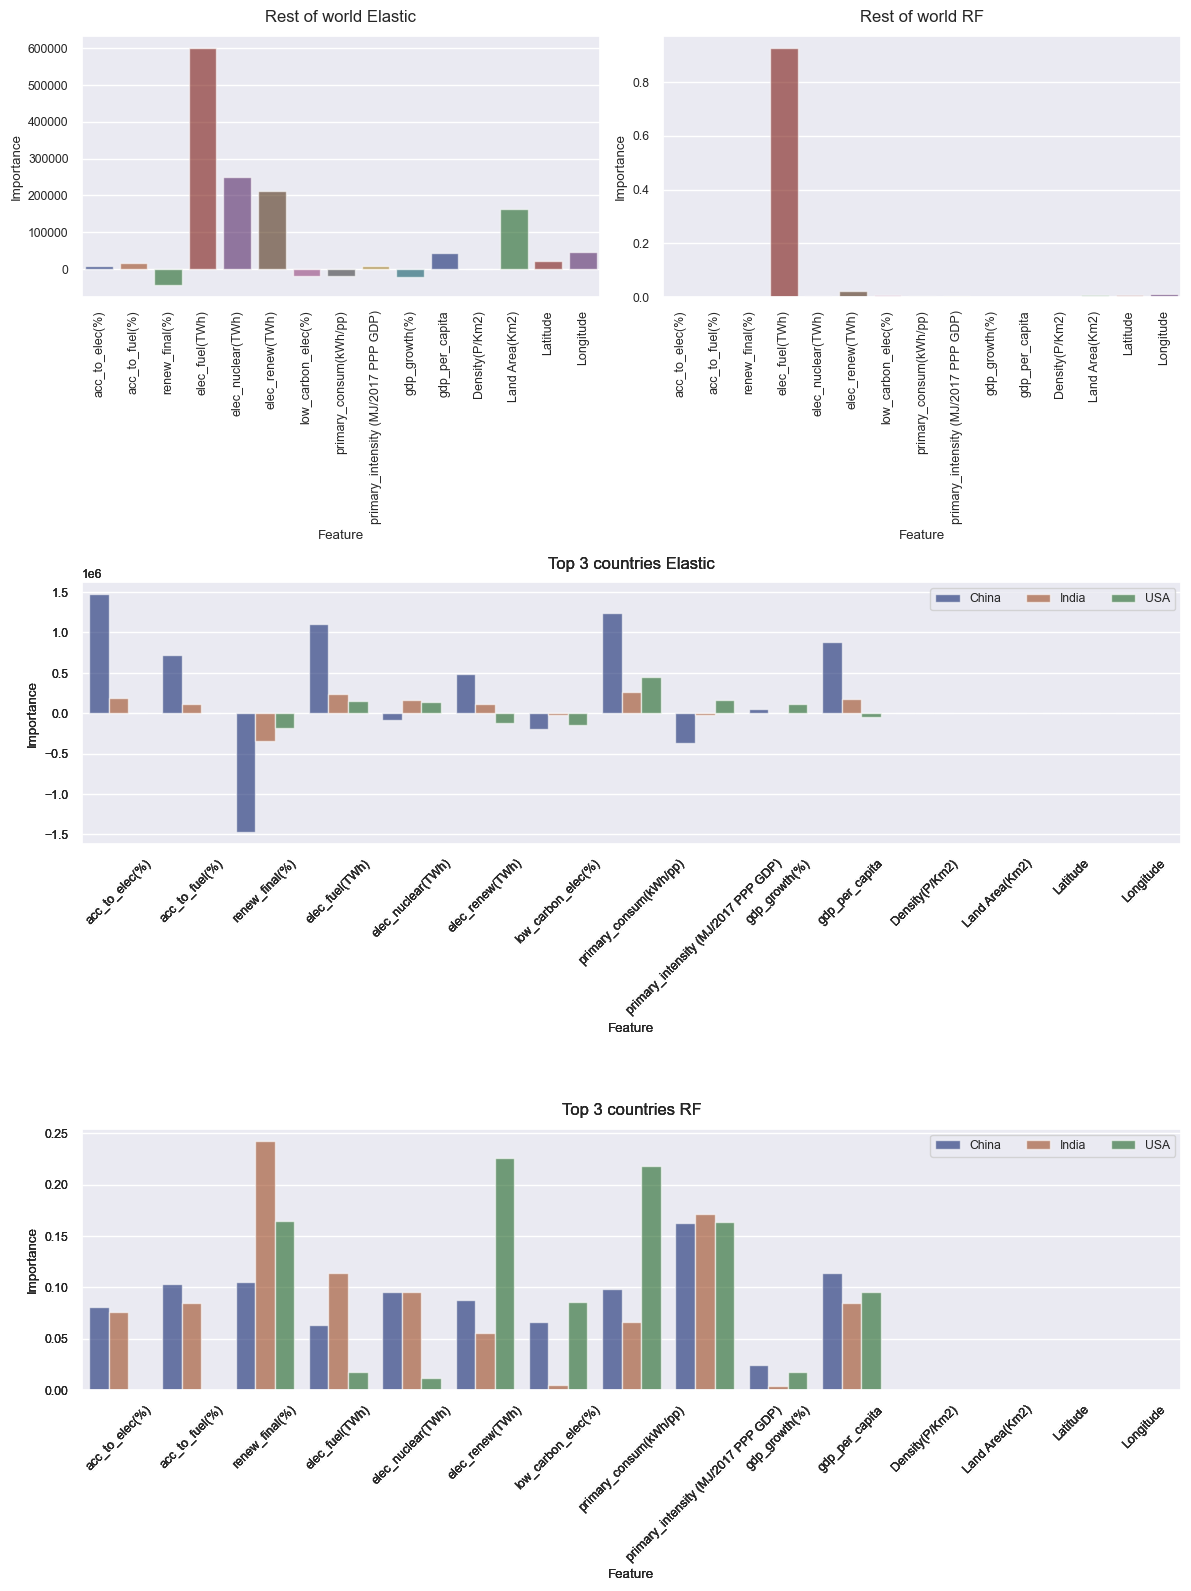

In [84]:
#Visualise the coefficient/feature importance 
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 16))
gs = GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

for region in coef_df['Region'].unique():
    if region == 'Rest of the World':
        temp = coef_df[coef_df['Region'] == 'Rest of the World']
        
        for i, model in enumerate(temp['Model'].unique()):
            ax = fig.add_subplot(gs[0, i])
            sns.barplot(data=temp[temp['Model'] == model], 
                        x="Feature", 
                        y="Importance",
                        palette="dark", 
                        alpha=.6, 
                        ax=ax)

            # Rotate labels of x-axes
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
            ax.set_title(f'Rest of world {model}', fontsize=12, pad=10)

    else:
        temp = coef_df[coef_df['Region'] != 'Rest of the World']

        for i, model in enumerate(temp['Model'].unique()):
            ax = fig.add_subplot(gs[i+1, :])
            
            sns.barplot(data=temp[temp['Model'] == model], 
                        x="Feature", 
                        y="Importance", 
                        hue="Region", 
                        palette="dark", 
                        alpha=.6, 
                        ax=ax)
        
            # Move legend box to the bottom
            ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=4)

            # Rotate labels of x-axes
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=9)
            ax.set_title(f'Top 3 countries {model}', fontsize=12, pad=10)

            # Turn off the other empty plots
            ax_off = fig.add_subplot(gs[i + 1, 1])
            ax_off.axis('off')
            ax_off.set_xticks([])
            ax_off.set_yticks([])

plt.tight_layout()
plt.show()

**Summary** : visualised coefficients/feature importances inidicate the below points.
1. **Rest of world** Elastic model reports elec_fuel(TWh), elec_nuclear(TWh), elec_renew(TWh) are the biggest contributors, whereas Random Forest can predict co2 consumption primarily based on elec_fuel(TWh).
2. **Top 3 countries** In contrast, for individual countries, these three electricity-related features are not as impactful.

**Reason for the Difference?**
\
The feature importances for the top 3 countries lack a consistent pattern. Assuming the same for the rest of countries, those 3 electricity-related features are the only universal features applicable regardless of countries.

**Next Steps**
\
Conventionally, a general model is built based on high correlations, which is valid with small sample sizes. **However, since CO2 emissions can be calculated linearly from emission factors like electricity consumption, knowing exact electricity consumption we can actually make a pretty good guess without the help of machine learning.** Therefore, this study will explore models excluding the three electricity-related features and features with minimal influence (e.g., 'Density(P/Km²)', 'Land Area(Km²)', 'Latitude', 'Longitude'). These will be compared to a linear model that includes only the three electricity-related features.
> https://www.epa.gov/energy/greenhouse-gases-equivalencies-calculator-calculations-and-references


## Step 2: Feature Selection with RFE
We can drop the feature one by one manually to test the feature importance and see the optimal number of features to be selected, however, this is time-consuming, so this study explored the ***Recursive Feature Elimination(RFE)***, which removes the weakest features until the specified number of features is reached. 
>https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV.score

In [87]:
# Set target variable
target = 'co2_by_country(kt)'
dropping_features = ['Entity', 'Year','Region','elec_fuel(TWh)', 'elec_nuclear(TWh)', 'elec_renew(TWh)',
                     'Density(P/Km2)', 'Land Area(Km2)','Latitude', 'Longitude']

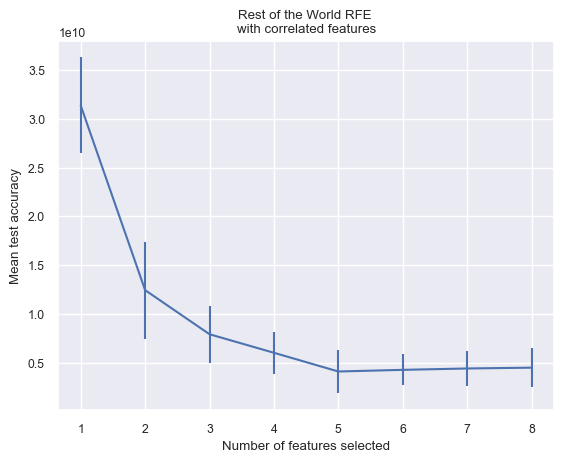

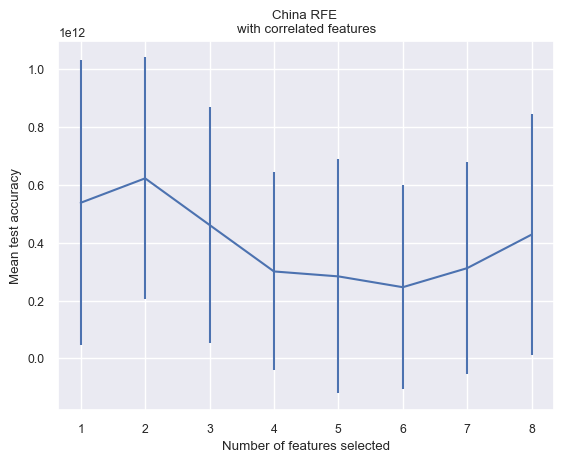

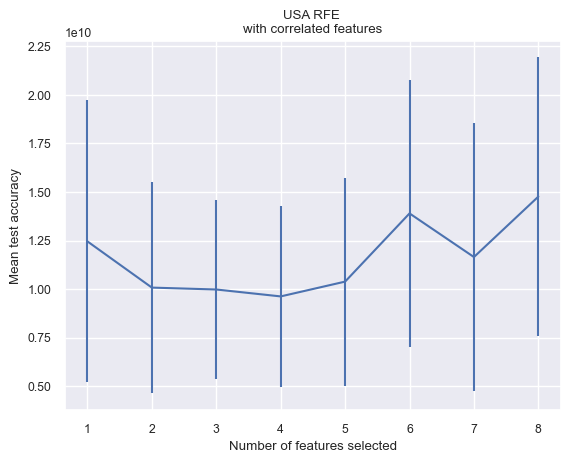

In [89]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

RF = RandomForestRegressor(n_estimators=100)

results=[]

for region in df['Region'].unique():
    X = df[df['Region'] == region].drop(dropping_features, axis=1)
    X = X.drop(target, axis=1)
    y = df[df['Region'] == region][target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Set the model for RFECV
    scaler = MinMaxScaler()
    rfecv = RFECV(RF,step=1, min_features_to_select=1, cv=4, scoring='neg_mean_squared_error')
    pipe = Pipeline([('scaler', scaler), ('rfe', rfecv)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    features = pipe.get_feature_names_out()
    params = pipe.get_params()

    result = {'Region':region,
              'Params':params,
              'features':features,
              'MSE':mse,
              'R2':R2}

    results.append(result)

    #Visualise 
    cv_results = pd.DataFrame(rfecv.cv_results_)
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test accuracy")
    plt.errorbar(
        x=range(1, len(cv_results['mean_test_score']) + 1),
        y=cv_results["mean_test_score"]*-1,
        yerr=cv_results["std_test_score"],
    )
    plt.title(f'{region} RFE \nwith correlated features')
    plt.show()

results_rfecv=pd.DataFrame(results)

In [90]:
# Print the features
for index, row in results_rfecv.iterrows():
    print(f"Region: {row['Region']}")
    print(f"Features: {row['features']}")

results_rfecv

Region: Rest of the World
Features: ['renew_final(%)' 'low_carbon_elec(%)' 'primary_consum(kWh/pp)'
 'primary_intensity (MJ/2017 PPP GDP)' 'gdp_per_capita']
Region: China
Features: ['acc_to_elec(%)' 'acc_to_fuel(%)' 'renew_final(%)'
 'primary_consum(kWh/pp)' 'primary_intensity (MJ/2017 PPP GDP)'
 'gdp_per_capita']
Region: India
Features: ['acc_to_elec(%)' 'acc_to_fuel(%)' 'renew_final(%)'
 'primary_consum(kWh/pp)' 'primary_intensity (MJ/2017 PPP GDP)'
 'gdp_per_capita']
Region: USA
Features: ['renew_final(%)' 'low_carbon_elec(%)' 'primary_consum(kWh/pp)'
 'primary_intensity (MJ/2017 PPP GDP)']


Region                                             Params  \
0  Rest of the World  {'memory': None, 'steps': [('scaler', MinMaxSc...   
1              China  {'memory': None, 'steps': [('scaler', MinMaxSc...   
2              India  {'memory': None, 'steps': [('scaler', MinMaxSc...   
3                USA  {'memory': None, 'steps': [('scaler', MinMaxSc...   

                                            features           MSE        R2  
0  [renew_final(%), low_carbon_elec(%), primary_c...  2.768984e+09  0.869752  
1  [acc_to_elec(%), acc_to_fuel(%), renew_final(%...  2.229528e+11  0.969474  
2  [acc_to_elec(%), acc_to_fuel(%), renew_final(%...  1.523189e+09  0.995081  
3  [renew_final(%), low_carbon_elec(%), primary_c...  4.823420e+09  0.968096

## Step 3: Compare Linear vs Non-linear model
In this step, the below models are compared extending the experiment from Section 3-Step 2.\
<br>
**Linear Model** with ['elec_fuel(TWh)', 'elec_nuclear(TWh)', 'elec_renew(TWh)']\
   employed models : Linear, Elastic, L1, L2

**Non-linear Model** with features other than ['elec_fuel(TWh)', 'elec_nuclear(TWh)', 'elec_renew(TWh)'] selected by RFE per country \
employed models : AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [169]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Set the estimators
linear_estimators = {
    'Linear': (LinearRegression(), {}),
    'Elastic': (ElasticNet(max_iter=10000), {'alpha': [0.1], 'l1_ratio': [0.9]}),
    'L1': (Lasso(max_iter=10000), {'alpha': [0.1, 1, 10]}),
    'L2': (Ridge(max_iter=10000), {'alpha': [0.1, 1, 10]})}

non_linear_estimators = {
    'Ada' : (AdaBoostRegressor(), {}),
    'Grd': (GradientBoostingRegressor(), {}),
    'RF': (RandomForestRegressor(), {'n_estimators': [100]})}

# Set linear features
target = 'co2_by_country(kt)'
linear_features = ['elec_fuel(TWh)', 'elec_nuclear(TWh)', 'elec_renew(TWh)','low_carbon_elec(%)']

In [295]:
#Hide Convergence Warning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [303]:
#Start with empty list for storage of results
results=[]
coef_df=pd.DataFrame()
j=0

for region in df['Region'].unique():
    X = df[df['Region'] == region]
    y = df[df['Region'] == region][target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Set the model for RFECV
    scaler = MinMaxScaler()
    
    # Iterate over Linear models
    for name, (estimator, param_grid) in linear_estimators.items():
        print('Searching {}: {} for {}...'.format(j, name, region))
        
        X_train_linear = X_train[linear_features]
        X_test_linear = X_test[linear_features]
        
        grid_search = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv=4)
        pipe = Pipeline([('scaler', scaler), ('gridcv', grid_search)])
        pipe.fit(X_train_linear, y_train)

        # Predict with Best Estimator
        y_pred = pipe.predict(X_test_linear)
        
        best_estimator = pipe.named_steps['gridcv'].best_estimator_
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Append Result
        result = {
            'Model': name,
            'Region': region,
            'MSE':mse,
            'R2': r2,
            'Best Params': pipe.named_steps['gridcv'].best_params_}
        
        results.append(result)

    # Iterate over Non-Linear models
    for name, (estimator, param_grid) in non_linear_estimators.items():
        print('Searching {}: {} for {}...'.format(j, name, region))
        
        non_linear_features = list(results_rfecv[results_rfecv['Region']==region]['features'])
        non_linear_features = [item for sublist in non_linear_features for item in sublist]
        
        X_train_nl = X_train[non_linear_features]
        X_test_nl = X_test[non_linear_features]
        
        grid_search = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv=4)
        pipe = Pipeline([('scaler', scaler), ('gridcv', grid_search)])
        pipe.fit(X_train_nl, y_train)

        # Predict with Best Estimator
        y_pred = pipe.predict(X_test_nl)
        
        best_estimator = pipe.named_steps['gridcv'].best_estimator_
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        # Append Result
        result = {
            'Model': name,
            'Region': region,
            'MSE':mse,
            'R2': r2,
            'Best Params': pipe.named_steps['gridcv'].best_params_,
            'Feature': non_linear_features}

        results.append(result)
    
    j += 1
    
results_ml=pd.DataFrame(results)

Searching 0: Linear for Rest of the World...
Searching 0: Elastic for Rest of the World...
Searching 0: L1 for Rest of the World...
Searching 0: L2 for Rest of the World...
Searching 0: Ada for Rest of the World...
Searching 0: Grd for Rest of the World...
Searching 0: RF for Rest of the World...
Searching 1: Linear for China...
Searching 1: Elastic for China...
Searching 1: L1 for China...
Searching 1: L2 for China...
Searching 1: Ada for China...
Searching 1: Grd for China...
Searching 1: RF for China...
Searching 2: Linear for India...
Searching 2: Elastic for India...
Searching 2: L1 for India...
Searching 2: L2 for India...
Searching 2: Ada for India...
Searching 2: Grd for India...
Searching 2: RF for India...
Searching 3: Linear for USA...
Searching 3: Elastic for USA...
Searching 3: L1 for USA...
Searching 3: L2 for USA...
Searching 3: Ada for USA...
Searching 3: Grd for USA...
Searching 3: RF for USA...


In [107]:
results_ml.sort_values(by=['Region','R2'], ascending=False)

Model             Region           MSE        R2  \
27       RF                USA  5.755925e+09  0.961928   
25      Ada                USA  7.962536e+09  0.947333   
26      Grd                USA  8.168723e+09  0.945969   
22  Elastic                USA  3.574753e+10  0.763554   
24       L2                USA  4.391697e+10  0.709518   
23       L1                USA  5.871126e+10  0.611664   
21   Linear                USA  6.243962e+10  0.587003   
0    Linear  Rest of the World  5.599459e+08  0.973661   
2        L1  Rest of the World  5.605988e+08  0.973630   
3        L2  Rest of the World  5.649556e+08  0.973426   
6        RF  Rest of the World  2.779315e+09  0.869266   
1   Elastic  Rest of the World  4.427564e+09  0.791736   
5       Grd  Rest of the World  6.298996e+09  0.703707   
4       Ada  Rest of the World  2.284755e+10 -0.074706   
19      Grd              India  9.679307e+08  0.996874   
16       L1              India  2.150493e+09  0.993055   
14   Linear              India  2.154668e+09  0.993041   
20       RF              India  2.790569e+09  0.990987   
17       L2              India  5.470858e+09  0.982331   
15  Elastic              India  6.510326e+09  0.978974   
18      Ada              India  6.676348e+09  0.978437   
9        L1              China  2.869250e+10  0.996072   
7    Linear              China  2.899614e+10  0.996030   
12      Grd              China  1.269453e+11  0.982619   
10       L2              China  2.103073e+11  0.971205   
11      Ada              China  2.620899e+11  0.964115   
13       RF              China  2.672289e+11  0.963412   
8   Elastic              China  2.969642e+11  0.959341   

                        Best Params  
27            {'n_estimators': 100}  
25                               {}  
26                               {}  
22  {'alpha': 0.1, 'l1_ratio': 0.9}  
24                     {'alpha': 1}  
23                   {'alpha': 0.1}  
21                               {}  
0                                {}  
2                     {'alpha': 10}  
3                    {'alpha': 0.1}  
6             {'n_estimators': 100}  
1   {'alpha': 0.1, 'l1_ratio': 0.9}  
5                                {}  
4                                {}  
19                               {}  
16                    {'alpha': 10}  
14                               {}  
20            {'n_estimators': 100}  
17                   {'alpha': 0.1}  
15  {'alpha': 0.1, 'l1_ratio': 0.9}  
18                               {}  
9                     {'alpha': 10}  
7                                {}  
12                               {}  
10                   {'alpha': 0.1}  
11                               {}  
13            {'n_estimators': 100}  
8   {'alpha': 0.1, 'l1_ratio': 0.9}

In [117]:
best_ml = results_ml[(results_ml['Model']=='L2') | (results_ml['Model']=='RF')]
best_ml

Model             Region           MSE        R2            Best Params
3     L2  Rest of the World  5.649556e+08  0.973426         {'alpha': 0.1}
6     RF  Rest of the World  2.779315e+09  0.869266  {'n_estimators': 100}
10    L2              China  2.103073e+11  0.971205         {'alpha': 0.1}
13    RF              China  2.672289e+11  0.963412  {'n_estimators': 100}
17    L2              India  5.470858e+09  0.982331         {'alpha': 0.1}
20    RF              India  2.790569e+09  0.990987  {'n_estimators': 100}
24    L2                USA  4.391697e+10  0.709518           {'alpha': 1}
27    RF                USA  5.755925e+09  0.961928  {'n_estimators': 100}

**Summary**\
The result is mixed. For USA, tree-based modles are obviously winner, however, for Rest of world, linear models peform better. For India nad China, the result is mixed, however the difference between models are not much. \
Compromising errors between models, **RandomFroest is seleceted for non-linear model**, and **L2 is selected for linear-model**.

# Conclusion
This section compares R2 scores(R-squared scores) of the above selected models
<br><br>
**Univariate Time-series** either AR or ARIMA\
**Linear Model(L2)** with ['elec_fuel(TWh)', 'elec_nuclear(TWh)', 'elec_renew(TWh)']\
**Non-linear Model(RF)** with features below.
- China: ['acc_to_elec(%)','acc_to_fuel(%)','renew_final(%)','primary_consum(kWh/pp)','primary_intensity (MJ/2017 PPP GDP)','gdp_per_capita']
- India: ['acc_to_elec(%)','acc_to_fuel(%)' ,renew_final(%)','primary_consum(kWh/pp)','primary_intensity (MJ/2017 PPP GDP)','gdp_per_capita']
- Rest of the World: ['renew_final(%)','low_carbon_elec(%)','primary_consum(kWh/pp)','primary_intensity (MJ/2017 PPP GDP)' 'gdp_per_capita']
- USA: ['renew_final(%)','low_carbon_elec(%)','primary_consum(kWh/pp)','primary_intensity (MJ/2017 PPP GDP)']

In [272]:
final_result = pd.concat([best_time_series, best_ml])
final_result = final_result.drop(['RMSE', 'MAE', 'train,test'], axis=1)

for index, row in final_result.iterrows():
    if pd.notna(row['Best model']):
        final_result.loc[index, 'Best Params'] = row['Best model']

final_result = final_result.drop('Best model', axis=1)
final_results = pd.pivot(data=final_result, columns='Model', index='Region', values='R2')
final_results

Model                    AR  Auto_ARIMA_d=1        L2        RF
Region                                                         
China                   NaN        0.960658  0.971205  0.963412
India                   NaN        0.742369  0.982331  0.990987
Rest of the World -6.721436             NaN  0.973426  0.869266
USA                     NaN       -0.616160  0.709518  0.961928
top3_sum           0.454556             NaN       NaN       NaN
total_sum          0.454995             NaN       NaN       NaN

**Evaluation**\
**Univariate Time-series** performs well for China, explaining 96% of its test data. For India, the predcition power is weaker explaining 74% of its test data. However, for USA and Rest of the Word, R2 scores display negative figures, meaning the prediction is worse than just taking the average of previous records.\
**Linear Model(L2)** the prediction works well across the countries with R2 scores above 0.97, except for USA (0.71). However, this may need caution, as the carbon emission is calculated based on electricity consumptions with coefficients. If electricity consumption is known, this model will provide good prediction.\
**Non-linear Model(RF)** tailored features other than electricity produces better predictions for Inidia ad USA, matching result for China, but fall short of 11 percent point for Rest of the World. This model will be helpful when electricity consumption is unknown, but have above models.
<br><br>
**Limitations/Future Works**
1. Univariate time-seires can be extedned to mulitvariate time-series analysis with VARIMA for Linear model, and RandomForest Forecast for RandomForest model
2. **Non-linear Model(RF)** utilises tailored features for each country, thus it cannot be universally applies acorss countries. This can be solved between two approchese, first is to buil general model using the same features, or seconde, buidlling a model that selects the best features on its own using RFE. 